In [19]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [95]:
def calculate_fitness(agent):
    return np.sum(agent)

In [33]:
def calculate_fitness_array(agents):
    fitnesses = np.array([calculate_fitness(agent) for agent in agents])
    return fitnesses - np.min(fitnesses)

In [22]:
def mutate_agent(agent, rate):
    mutations = np.random.uniform(0,1/rate, size=agent.shape)
    mutations[mutations>1] = 0
    mutations[mutations!=0] = 1
    return np.logical_xor(agent, mutations)

In [60]:
def mutate_array(agents, rate):
    mutated_agents = np.array([mutate_agent(agent, rate) for agent in agents])
    return mutated_agents

In [24]:
def merge_genes(a, b, n_genes):
    merged = np.zeros(shape=(n_genes, int(a.shape[0]/n_genes)))
    
    genes_a = a.reshape(n_genes, int(a.shape[0]/n_genes))
    genes_b = b.reshape(n_genes, int(b.shape[0]/n_genes))
    to_merge = np.random.randint(0,2, size=(n_genes))

    merged[to_merge == 0] = genes_a[to_merge == 0]
    merged[to_merge == 1] = genes_b[to_merge == 1]
    
    return merged.reshape(-1)

In [25]:
def genes_to_rgb(agent):
    RGB_driver = agent.reshape(8, 3, int(agent.shape[0]/24))
    image_pixels = np.zeros(shape=(1, int(agent.shape[0]/24), 3))
    for i, pixel in enumerate(RGB_driver):
        for j, channel in enumerate(pixel):
            image_pixels[0][i][j] = channel.dot(2**np.arange(channel.size)[::-1])
    return image_pixels.astype(int)

In [26]:
def show_n_agents(agents, n):
    img = []
    indices = np.random.randint(0,agents.shape[0], size=(n))
    for index in indices:
        rgb_agent = genes_to_rgb(agents[index])
        img.append(rgb_agent[0])
    plt.imshow(np.array(img))
    plt.axis('off');

In [109]:
num_genes = 192 #Representable as 8 pixels of 255 RGB
num_drivers = 50
num_generations = 300
n_mutations = 1

In [139]:
current_generation = np.random.randint(0,2, size=(num_drivers, num_genes))
first_generation = np.copy(current_generation)
history = []

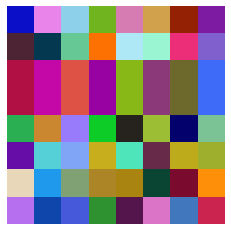

In [140]:
show_n_agents(current_generation, 8)

In [141]:
for i in range(num_generations):
    fitnesses = calculate_fitness_array(current_generation)
    gene_pool = np.array(random.choices(current_generation, weights = fitnesses, k=current_generation.shape[0]*2))

    next_generation = np.array([merge_genes(gene_pool[i], gene_pool[i+1], 24) for i in range(int(len(gene_pool)/2))])
    next_generation = mutate_array(next_generation, 0.001)
                                   
    current_generation = next_generation
    history.append(np.mean([calculate_fitness(agent) for agent in current_generation])/num_genes)

19.26


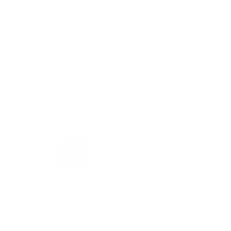

In [148]:
show_n_agents(current_generation, 8)

0.5051041666666667 -> 0.999375 in 300 generations


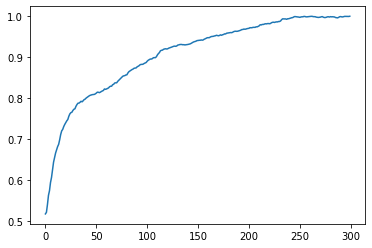

In [150]:
plt.plot(np.arange(0, len(history)), history);
print(f'{np.mean(first_generation.sum(axis=1)/num_genes)} -> {np.mean(current_generation.sum(axis=1)/num_genes)} in {num_generations} generations')